# STAT207 Mini-Project #2 - Video Game Sales Prediction 


Justin Starks 

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [345]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Ignore scikit-learn ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## 1. Introduction

In this report, I plan to explore a video game dataset. The primary research goal of this project is to build a predictive model that will perform the best when predicting metric sales for new datasets. I would like for the chosen model to also yield reliable interpretative insights
about the nature of the relationship between the variables I chose in this dataset. Furthermore, this may provide a valuable insight for various stakeholders, including video game creators, and video game/entertainment platforms. By understanding the relationship between the variables chosen in this project it can tell them about strategies to implement which inturn enhances the user experience, increases profit, and more.

## 2. Dataset Discussion

For this analysis, I will be using a dataset that I obtained from , which is known for having a various array of datasets for research and analysis. The dataset I got comprises of the following information: Video game title, Genre, Publishers, review score, and metric sales. This dataset is useful for seeing what variables can influence sales.

## Data Source

This dataset was found by Dr.Joe Cox, a Faculty of Business & Law, School of Accounting, Economics and Finance at the University of Portsmouth. The following dataset has data on thousands of video games between 2004 and 2010. This was found on the following link on the Mini Project 2 Specifications PDF https://corgis-edu.github.io/corgis/csv/video_games/ on 3/21/2024.

## Dataset Display

Before cleaning the dataset there was 1212 rows. 

In [346]:
df = pd.read_csv('video_games.csv')
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [347]:
df.shape[0]

1212

## Dataset Information 

Each row represents a video game. The dataset was compiled byDr.Joe Cox, a Faculty of Business & Law, School of Accounting, Economics and Finance at the University of Portsmouth. The following dataset has data on thousands of video games between 2004 and 2010. I doubt this dataset would include all possible observations from 2004 to 2010 since there may be limitations from accessing certain video games. This could result in the dataset being more general and impact the reliability of models that predict certain variables. However, this dataset is still useful in analyzing the available data for stakeholders and strategies to aid publishers when creating video games.

 I will be predicting Metric Sales using these explanatory variables:

 1. Genre
 2. Review Score 
 3. Average Main Story Length
 4. Publisher 
 5. Max Players 

 

## 3. Dataset Cleaning

In [348]:
df.isnull().sum()

Title                              0
Features.Handheld?                 0
Features.Max Players               0
Features.Multiplatform?            0
Features.Online?                   0
Metadata.Genres                    0
Metadata.Licensed?                 0
Metadata.Publishers              264
Metadata.Sequel?                   0
Metrics.Review Score               0
Metrics.Sales                      0
Metrics.Used Price                 0
Release.Console                    0
Release.Rating                     0
Release.Re-release?                0
Release.Year                       0
Length.All PlayStyles.Average      0
Length.All PlayStyles.Leisure      0
Length.All PlayStyles.Median       0
Length.All PlayStyles.Polled       0
Length.All PlayStyles.Rushed       0
Length.Completionists.Average      0
Length.Completionists.Leisure      0
Length.Completionists.Median       0
Length.Completionists.Polled       0
Length.Completionists.Rushed       0
Length.Main + Extras.Average       0
L

In [349]:
clean_df = df.dropna()
clean_df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [350]:
clean_df.shape[0]

948

In [351]:
df.shape[0] - clean_df.shape[0]

264

In [352]:
clean_df.duplicated().sum()

0

In [353]:
clean_df = clean_df[["Metrics.Sales" ,  "Release.Year" , "Metrics.Review Score" , "Length.Main Story.Average" , "Features.Max Players" , "Metrics.Used Price", "Release.Rating"]]
clean_df

,Metrics.Sales,Release.Year,Metrics.Review Score,Length.Main Story.Average,Features.Max Players,Metrics.Used Price,Release.Rating
0,4.69,2004,85,14.333333,1,24.95,E
1,0.56,2004,89,10.333333,1,14.95,E
2,0.54,2004,81,1.916667,2,22.95,E
3,0.49,2004,81,0.000000,1,12.95,E
4,0.45,2004,61,8.350000,1,14.95,E
...,...,...,...,...,...,...,...
1195,0.04,2008,67,4.000000,1,13.95,M
1197,0.04,2008,42,0.000000,1,14.95,E
1199,0.04,2008,68,0.000000,1,19.95,E
1204,0.03,2008,58,5.183333,1,11.95,T


The dataset contained only implicit values. The implicit values were represented by empty fields and NaN values in the dataframe. To combatthe missing values, I used dropna() to remove rows with any missing values. This course of action ensures the analysis is based on complete data without any missing values. A total of 264 rows were dropped. Some pros of removing rows with missing values ensures that the analysis is based on complete data. This can help avoid potential errors in analysis that would stem from missing values. A downside of dropping rows with missing values is that it may reduce the sample size and potentially lead to a loss of information, especially if the missing values are not missing at random. 


## Outlier Cleaning 

Below are the boxplot for the numerical variables with the outliers. Some pros of removing the extreme values as outliers can help avoid disproportionately affect the statistics. Furthermore, by removing outliers, it will significantly help the results to be more reliable and more robust. On the other hand, some cons that this might lead to is the loss of information, which can lead to overlooking certain insights and responses, and potentially create a bias in the results. Removing outliers from a video game dataset may lead to loss of valuable insights into player behavior and game dynamics, as outliers could represent genuine and informative data points. Additionally, indiscriminate removal of outliers without careful consideration may introduce bias and affect the validity of statistical analyses or machine learning models trained on the data. When building a predictive model, it's crucial to include outliers in the dataset as they can contain valuable information that influences the model's performance and accuracy. Excluding outliers may result in a model that fails to capture the full range of variation in the data, leading to suboptimal predictions and potentially overlooking important patterns or trends.

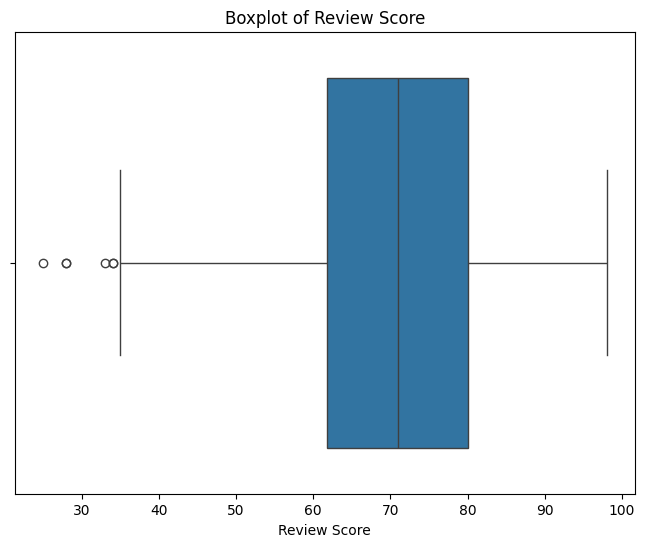

In [354]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Metrics.Review Score', data=clean_df)
plt.title('Boxplot of Review Score')
plt.xlabel("Review Score")
plt.show()

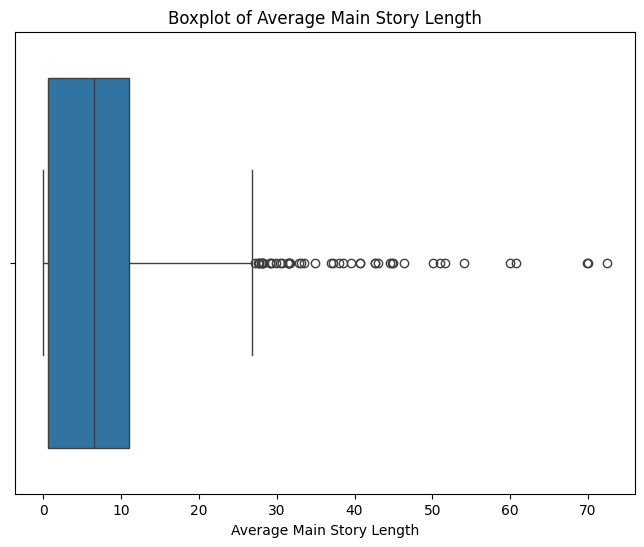

In [355]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Length.Main Story.Average', data=clean_df)
plt.title('Boxplot of Average Main Story Length')
plt.xlabel("Average Main Story Length")
plt.show()

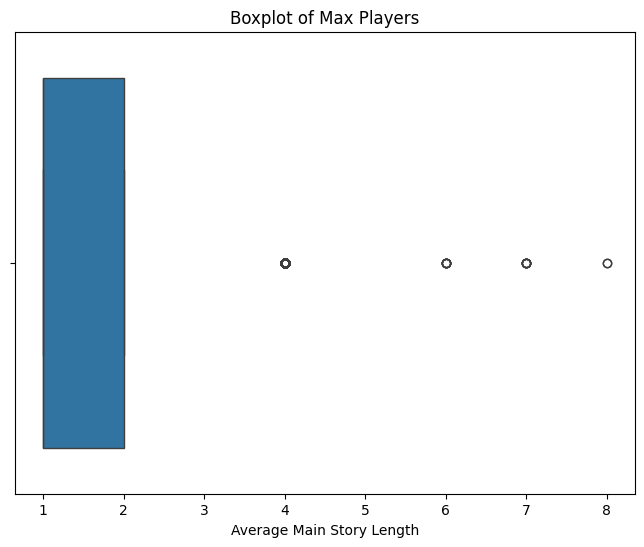

In [356]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Features.Max Players', data=clean_df)
plt.title('Boxplot of Max Players')
plt.xlabel("Average Main Story Length")
plt.show()

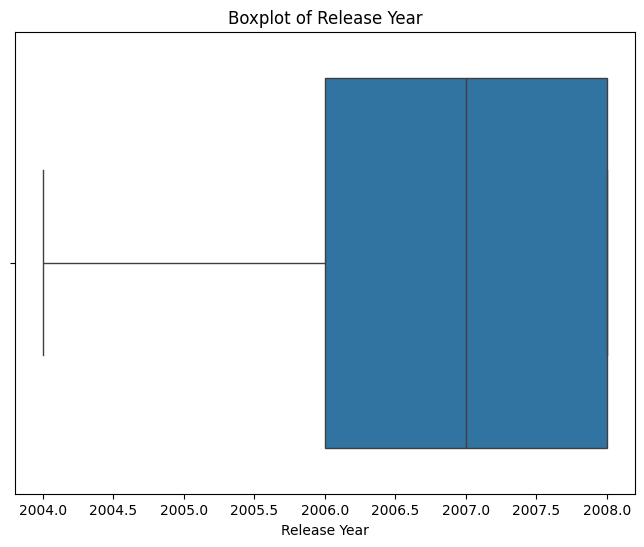

In [357]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Release.Year', data=clean_df)
plt.title('Boxplot of Release Year')
plt.xlabel("Release Year")
plt.show()

## 4. Preliminary Analysis

Variable Transformation 

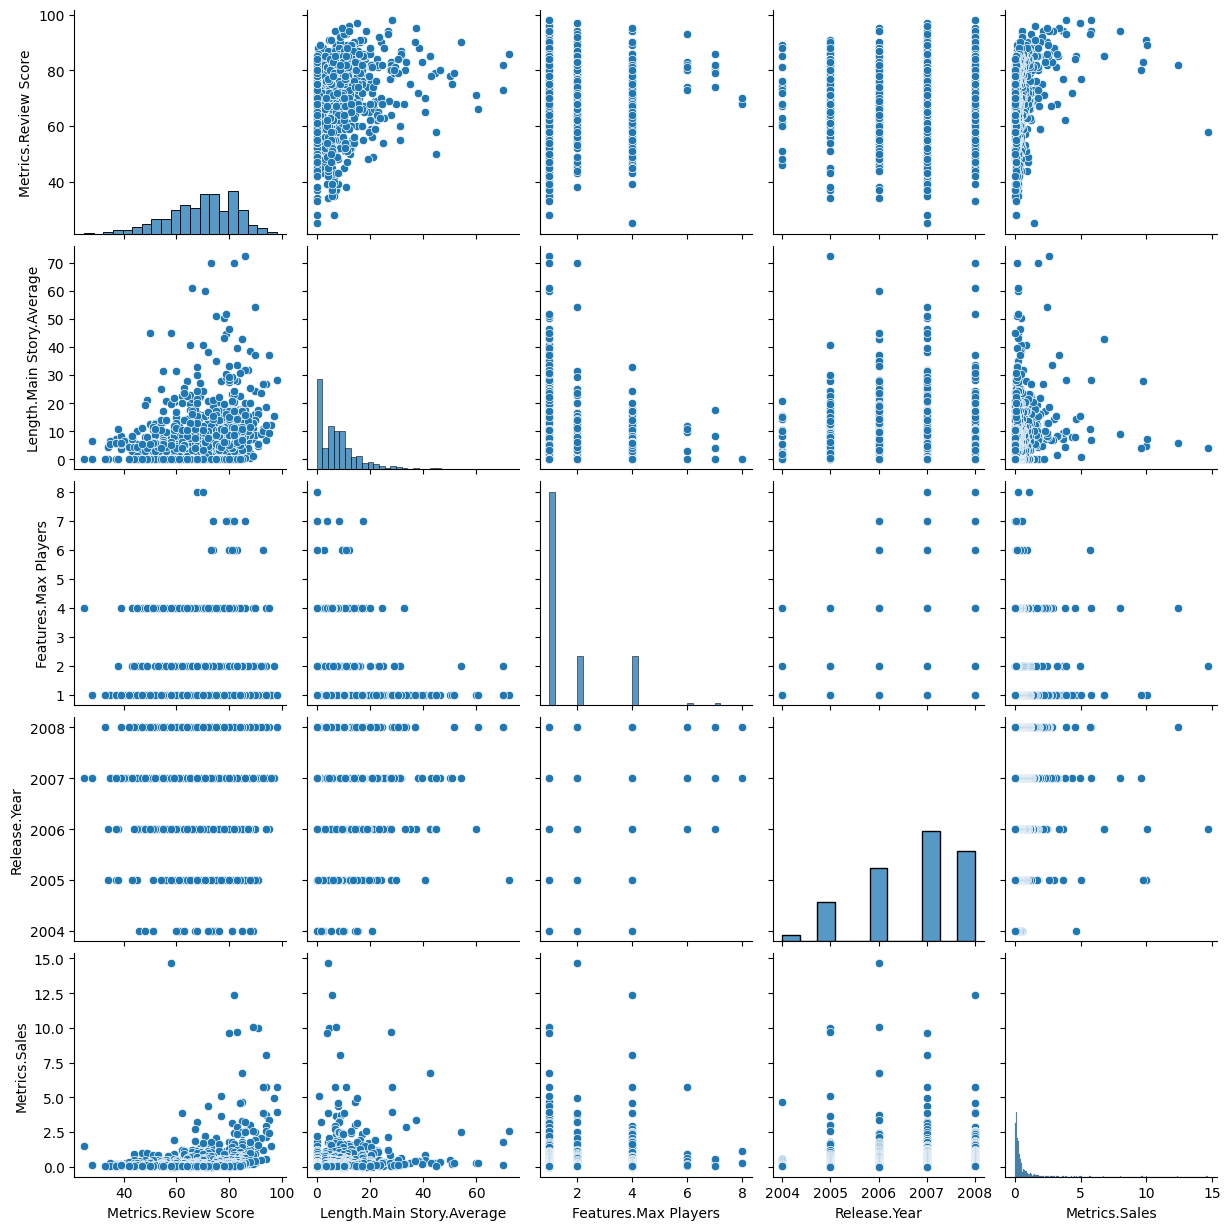

In [358]:
numerical_variables = clean_df[["Metrics.Review Score" , "Length.Main Story.Average" , "Features.Max Players" , "Release.Year", "Metrics.Sales"]]
sns.pairplot(numerical_variables)

In [359]:
## Renaming Columns for Syntax Purposes 
clean_df = clean_df.rename(columns ={'Metrics.Sales': 'Metrics_Sales',
    'Release.Year': 'Release_Year',
    'Metrics.Review Score': 'Metrics_Review_Score',
    'Length.Main Story.Average': 'Length_Main_Story_Average',
    'Features.Max Players': 'Features_Max_Players',
    'Metrics.Used Price': 'Metrics_Used_Price',
    'Release.Rating': 'Release_Rating'})
clean_df

,Metrics_Sales,Release_Year,Metrics_Review_Score,Length_Main_Story_Average,Features_Max_Players,Metrics_Used_Price,Release_Rating
0,4.69,2004,85,14.333333,1,24.95,E
1,0.56,2004,89,10.333333,1,14.95,E
2,0.54,2004,81,1.916667,2,22.95,E
3,0.49,2004,81,0.000000,1,12.95,E
4,0.45,2004,61,8.350000,1,14.95,E
...,...,...,...,...,...,...,...
1195,0.04,2008,67,4.000000,1,13.95,M
1197,0.04,2008,42,0.000000,1,14.95,E
1199,0.04,2008,68,0.000000,1,19.95,E
1204,0.03,2008,58,5.183333,1,11.95,T


Fitted vs. Residual Plots 

In [360]:
full_model = smf.ols(formula='Metrics_Sales~Release_Year+Metrics_Review_Score + Length_Main_Story_Average + Features_Max_Players+ Metrics_Used_Price + Release_Rating' , data= clean_df).fit()


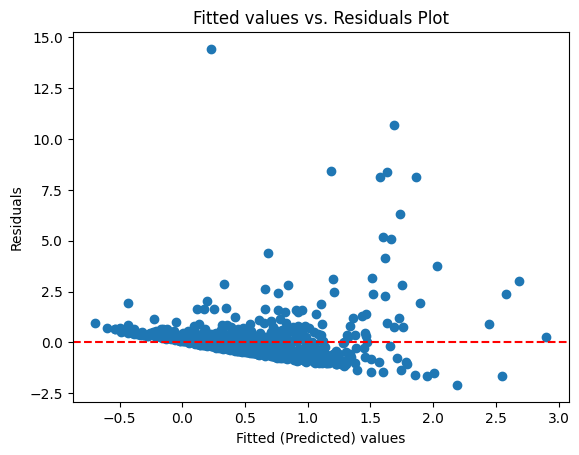

In [361]:
plt.scatter(full_model.fittedvalues, full_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

The "Fitted vs. Residual Plots" does not meet linearity assumptions and transforming one or more of my variables could improve the fit of my linear regression model. Specifically a logarithmic transformation can be applied to the response variable or explanatory variables to address this issue. Non-linear relationships between independent and dependent variables violate the linearity assumption of linear regression. By doing a log transformation can sometimes convert a non-linear relationship into a linear one, making it possible to model the relationship with linear regression.

In [362]:
clean_df['Log_Metric_Sales'] = np.log(clean_df['Metrics_Sales'] + 1)

                                    

In [363]:
clean_df

,Metrics_Sales,Release_Year,Metrics_Review_Score,Length_Main_Story_Average,Features_Max_Players,Metrics_Used_Price,Release_Rating,Log_Metric_Sales
0,4.69,2004,85,14.333333,1,24.95,E,1.738710
1,0.56,2004,89,10.333333,1,14.95,E,0.444686
2,0.54,2004,81,1.916667,2,22.95,E,0.431782
3,0.49,2004,81,0.000000,1,12.95,E,0.398776
4,0.45,2004,61,8.350000,1,14.95,E,0.371564
...,...,...,...,...,...,...,...,...
1195,0.04,2008,67,4.000000,1,13.95,M,0.039221
1197,0.04,2008,42,0.000000,1,14.95,E,0.039221
1199,0.04,2008,68,0.000000,1,19.95,E,0.039221
1204,0.03,2008,58,5.183333,1,11.95,T,0.029559


In [364]:
transformation_model = clean_df[["Release_Year",
                                 "Metrics_Review_Score"	,
                                 "Length_Main_Story_Average",
                                 "Features_Max_Players",
                                     	"Metrics_Used_Price",
                                            "Release_Rating",	
                                            "Log_Metric_Sales"]]
fitted_resid_transformation = smf.ols(formula='Log_Metric_Sales~Release_Year+Metrics_Review_Score + Length_Main_Story_Average + Features_Max_Players+ Metrics_Used_Price + Release_Rating' , data= transformation_model).fit()
fitted_resid_transformation

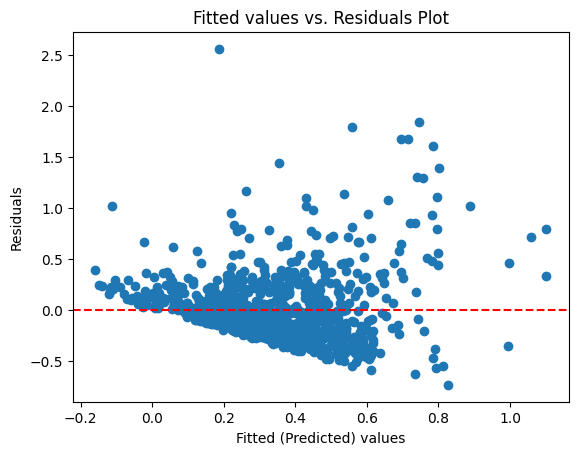

In [365]:
plt.scatter(fitted_resid_transformation.fittedvalues, fitted_resid_transformation.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

After doing a logarithmic transformation to my response variable, I have seen that this transformation has helped with linearity assumption being met because now some boxes have an even distrubtion versus the inital Fitted vs. Residual plot where no boxes had an even distribution. 

Interaction Terms 

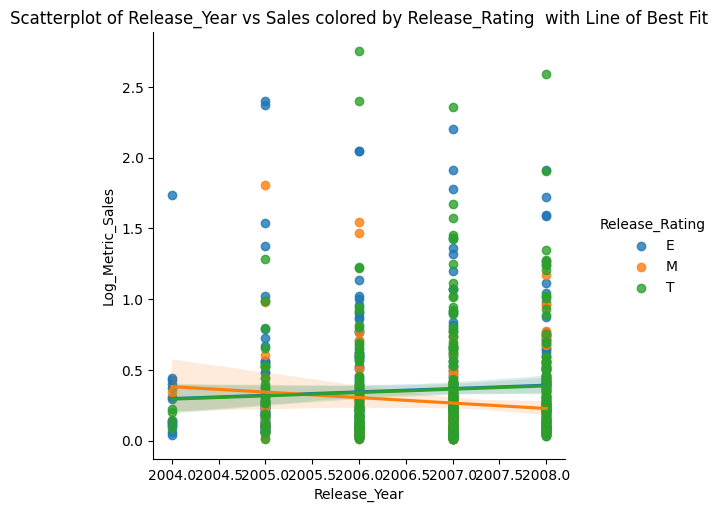

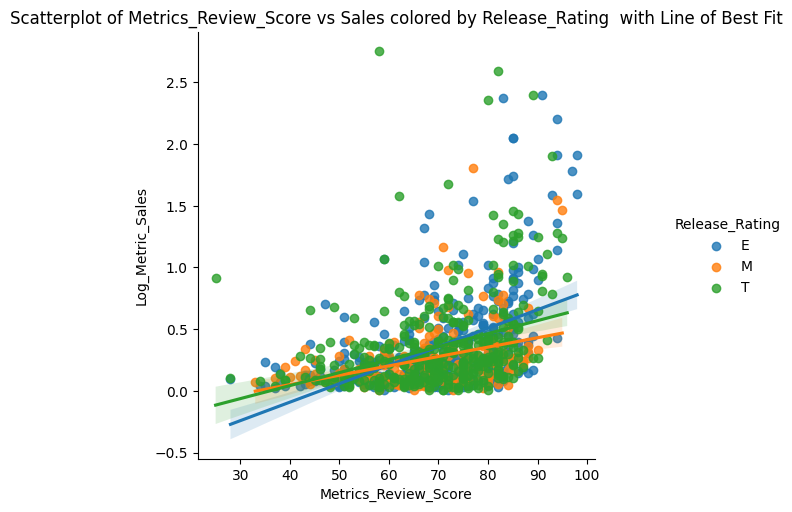

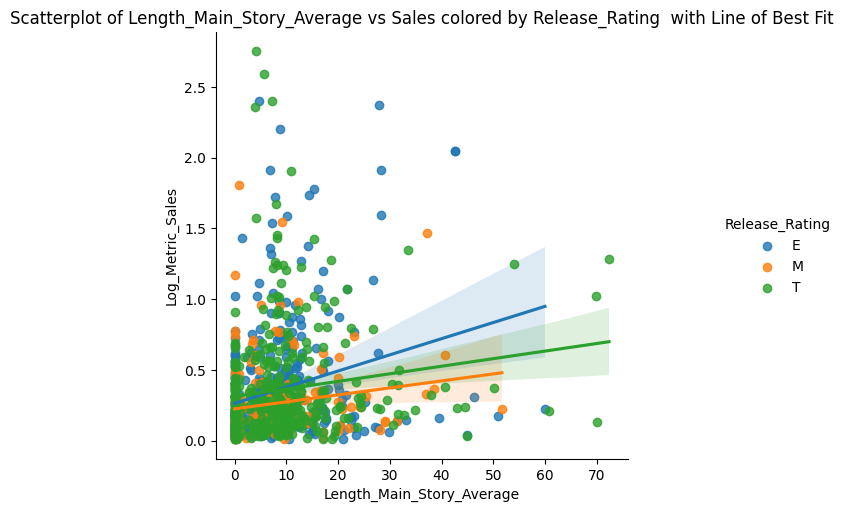

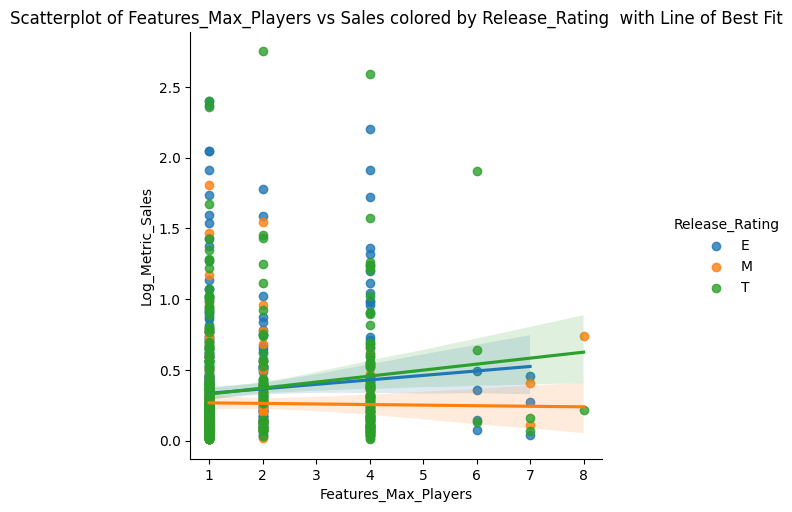

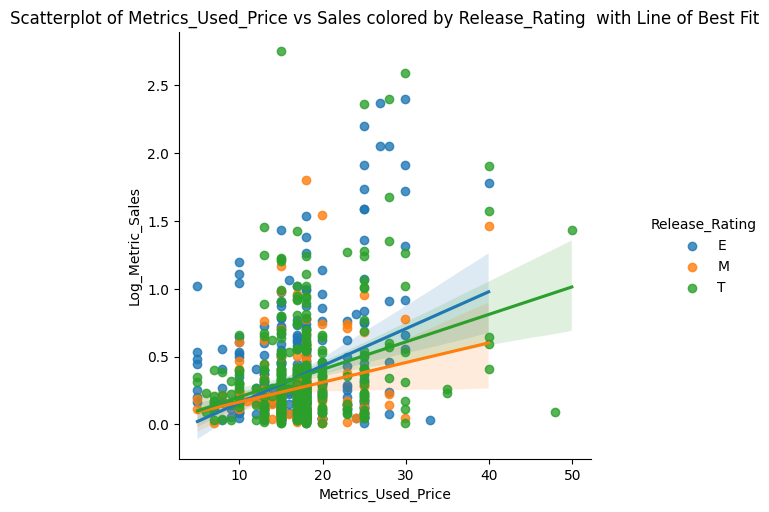

ValueError: could not convert string to float: 'E'

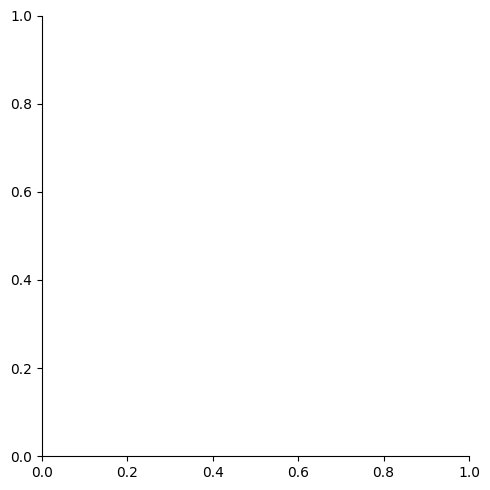

In [366]:

numerical_columns = ["Release_Year", "Metrics_Review_Score", "Length_Main_Story_Average", "Features_Max_Players", "Metrics_Used_Price", "Release_Rating", "Log_Metric_Sales"]
categorical = 'Release_Rating'  
for num_var in numerical_columns:
    sns.lmplot(x=num_var, y="Log_Metric_Sales", hue=categorical, data=transformation_model)
    plt.title(f'Scatterplot of {num_var} vs Sales colored by {categorical}  with Line of Best Fit')
    plt.xlabel(num_var)
    plt.ylabel('Log_Metric_Sales')
    plt.show()


Looking at these lmplots, Used Price and Release rating have an interaction with sales because the slope of the lines change based on the rating. To help with accuracy, I will add this interaction term to my model to see if it will increase the Test R^2. 


## 5. Predictive Models

In [ ]:
transformation_model

,Release_Year,Metrics_Review_Score,Length_Main_Story_Average,Features_Max_Players,Metrics_Used_Price,Release_Rating,Log_Metric_Sales
0,2004,85,14.333333,1,24.95,E,1.738710
1,2004,89,10.333333,1,14.95,E,0.444686
2,2004,81,1.916667,2,22.95,E,0.431782
3,2004,81,0.000000,1,12.95,E,0.398776
4,2004,61,8.350000,1,14.95,E,0.371564
...,...,...,...,...,...,...,...
1195,2008,67,4.000000,1,13.95,M,0.039221
1197,2008,42,0.000000,1,14.95,E,0.039221
1199,2008,68,0.000000,1,19.95,E,0.039221
1204,2008,58,5.183333,1,11.95,T,0.029559


In [ ]:
#Turning Release_Rating into a numerical variable 
categorical_variables = transformation_model[["Release_Rating"]]
dummies = pd.get_dummies(categorical_variables, drop_first = True, dtype=int)
dummies

,Release_Rating_M,Release_Rating_T
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1195,1,0
1197,0,0
1199,0,0
1204,0,1


In [ ]:
#Concat
transformation_model = pd.concat([dummies, transformation_model] , axis = 1)
transformation_model = transformation_model.drop(["Release_Rating"] , axis = 1)
transformation_model

,Release_Rating_M,Release_Rating_T,Release_Year,Metrics_Review_Score,Length_Main_Story_Average,Features_Max_Players,Metrics_Used_Price,Log_Metric_Sales
0,0,0,2004,85,14.333333,1,24.95,1.738710
1,0,0,2004,89,10.333333,1,14.95,0.444686
2,0,0,2004,81,1.916667,2,22.95,0.431782
3,0,0,2004,81,0.000000,1,12.95,0.398776
4,0,0,2004,61,8.350000,1,14.95,0.371564
...,...,...,...,...,...,...,...,...
1195,1,0,2008,67,4.000000,1,13.95,0.039221
1197,0,0,2008,42,0.000000,1,14.95,0.039221
1199,0,0,2008,68,0.000000,1,19.95,0.039221
1204,0,1,2008,58,5.183333,1,11.95,0.029559


In [ ]:
#Train/Test Split
train_df , test_df = train_test_split(transformation_model, test_size=0.20 , random_state= 207)
print(train_df.shape[0]/transformation_model.shape[0])
transformation_model.head()

0.79957805907173


,Release_Rating_M,Release_Rating_T,Release_Year,Metrics_Review_Score,Length_Main_Story_Average,Features_Max_Players,Metrics_Used_Price,Log_Metric_Sales
0,0,0,2004,85,14.333333,1,24.95,1.738710
1,0,0,2004,89,10.333333,1,14.95,0.444686
2,0,0,2004,81,1.916667,2,22.95,0.431782
3,0,0,2004,81,0.000000,1,12.95,0.398776
4,0,0,2004,61,8.350000,1,14.95,0.371564


In [ ]:
#Training Features Matrix 
x_train = train_df.drop(['Log_Metric_Sales'], axis =1)
x_train.head()

,Release_Rating_M,Release_Rating_T,Release_Year,Metrics_Review_Score,Length_Main_Story_Average,Features_Max_Players,Metrics_Used_Price
1053,1,0,2008,54,0.000000,2,12.95
1096,1,0,2008,58,6.000000,4,24.95
614,0,1,2007,75,12.000000,4,7.95
798,0,0,2007,51,4.000000,1,19.95
932,0,1,2008,55,6.866667,2,12.95


In [ ]:
#Training Target Array 
y_train = train_df["Log_Metric_Sales"]
y_train.head()

1053    0.148420
1096    0.095310
614     0.215111
798     0.039221
932     0.398776
Name: Log_Metric_Sales, dtype: float64

In [ ]:
#Testing Features Matrix 
x_test = test_df.drop(['Log_Metric_Sales'], axis =1)
x_test.head()

,Release_Rating_M,Release_Rating_T,Release_Year,Metrics_Review_Score,Length_Main_Story_Average,Features_Max_Players,Metrics_Used_Price
331,0,0,2006,71,5.983333,1,17.95
523,0,1,2007,73,0.000000,1,17.95
1167,0,1,2008,65,0.000000,1,14.95
559,0,1,2007,53,5.316667,1,17.95
1035,0,0,2008,67,10.700000,1,24.95


In [ ]:
#Testing Target Array
y_test = test_df["Log_Metric_Sales"]
y_test.head()

331     0.095310
523     0.371564
1167    0.058269
559     0.300105
1035    0.182322
Name: Log_Metric_Sales, dtype: float64

In [ ]:
#Scaling
numerical_variables = train_df[["Release_Year" , "Metrics_Review_Score" , "Length_Main_Story_Average" , "Features_Max_Players", "Metrics_Used_Price" ,  "Release_Rating_M", "Release_Rating_T"]]
scalar_training = StandardScaler()
scaled_expl_vars = scalar_training.fit_transform(numerical_variables)

features_matrix = pd.DataFrame(scaled_expl_vars , columns = numerical_variables.columns)
features_matrix.head()

,Release_Year,Metrics_Review_Score,Length_Main_Story_Average,Features_Max_Players,Metrics_Used_Price,Release_Rating_M,Release_Rating_T
0,1.185867,-1.229445,-0.918596,0.224234,-0.835397,2.056109,-0.809334
1,1.185867,-0.916563,-0.247825,1.812736,1.463082,2.056109,-0.809334
2,0.238673,0.413186,0.422946,1.812736,-1.793097,-0.486355,1.235584
3,0.238673,-1.464107,-0.471415,-0.570016,0.505382,-0.486355,-0.809334
4,1.185867,-1.151224,-0.150936,0.224234,-0.835397,-0.486355,1.235584


Multicolinearity Checking

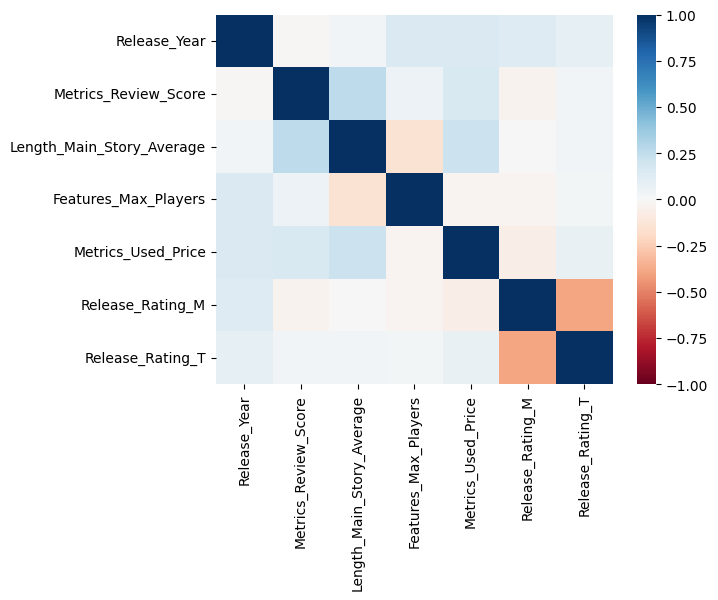

In [ ]:
sns.heatmap(features_matrix.corr(),vmin=-1, vmax=1, cmap='RdBu')
plt.show()

None of the explanatory variables have issues with multicolinearity because their correlation coefficient is not above 0.7.

Non-Regularized Linear Regression Full Model

In [ ]:
#Fitting the Model
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(x_train, y_train)


LinearRegression()

In [ ]:
#Test R^2
lin_reg_mod.score(x_test , y_test)

0.3091205432362544

NR Linear Regression Full Model with Interaction Terms 

In [367]:

interactions = smf.ols(formula ='Log_Metric_Sales ~ Release_Rating_M + Release_Rating_T + Release_Year + Metrics_Review_Score + Length_Main_Story_Average + Features_Max_Players + Metrics_Used_Price + Metrics_Used_Price:Release_Rating_M + Metrics_Used_Price:Release_Rating_T', data=test_df).fit()
interactions_model_pred_test = interactions.predict(test_df)
test_model_r2 = r2_score(test_df["Log_Metric_Sales"], interactions_model_pred_test)
test_model_r2


0.33326097254062415

Feature Selection

In [ ]:
full_model = smf.ols(formula = 'Log_Metric_Sales~Release_Rating_M+Release_Rating_T+Release_Year+Metrics_Review_Score+Length_Main_Story_Average+Features_Max_Players+Metrics_Used_Price' , data = test_df).fit()
full_model_test = test_df["Log_Metric_Sales"]
fullmodel_pred_test = full_model.predict(test_df)
fullmodel_r2 = r2_score(full_model_test,  fullmodel_pred_test)
fullmodel_r2

0.3213641523903681

In [ ]:
#Removing Release_Rating_M
test_model = smf.ols(formula = 'Log_Metric_Sales~+Release_Rating_T+Release_Year+Metrics_Review_Score+Length_Main_Story_Average+Features_Max_Players+Metrics_Used_Price' , data = train_df).fit()
test_model_test = test_df["Log_Metric_Sales"]
test_model_pred_test = test_model.predict(test_df)
test_model_r2 = r2_score(test_model_test, test_model_pred_test)
test_model_r2

0.3062773992556075

In [ ]:
#Removing Release_Rating_T
test_model = smf.ols(formula = 'Log_Metric_Sales~Release_Rating_M+Release_Year+Metrics_Review_Score+Length_Main_Story_Average+Features_Max_Players+Metrics_Used_Price' , data = test_df).fit()
test_model_test = test_df["Log_Metric_Sales"]
test_model_pred_test = test_model.predict(test_df)
test_model_r2 = r2_score(test_model_test, test_model_pred_test)
test_model_r2


0.3212186951336088

In [ ]:
#Removing Release_Year
test_model = smf.ols(formula = 'Log_Metric_Sales~+Release_Rating_T+Metrics_Review_Score+Length_Main_Story_Average+Features_Max_Players+Metrics_Used_Price' , data = train_df).fit()
test_model_test = test_df["Log_Metric_Sales"]
test_model_pred_test = test_model.predict(test_df)
test_model_r2 = r2_score(test_model_test, test_model_pred_test)
test_model_r2

0.3055932856772636

In [ ]:
 #Removing Review Score
smf.ols(formula = 'Log_Metric_Sales~Release_Rating_M+Release_Rating_T+Release_Year+Length_Main_Story_Average+Features_Max_Players+Metrics_Used_Price' , data = test_df).fit()
test_model_test = test_df["Log_Metric_Sales"]
test_model_pred_test = test_model.predict(test_df)
test_model_r2 = r2_score(test_model_test, test_model_pred_test)
test_model_r2

0.2512504463189329

In [ ]:
#Removing Average Main Story Length
test_model = smf.ols(formula = 'Log_Metric_Sales~Release_Rating_M+Release_Rating_T+Release_Year+Metrics_Review_Score+Features_Max_Players+Metrics_Used_Price' , data = test_df).fit()
test_model_test = test_df["Log_Metric_Sales"]
test_model_pred_test = test_model.predict(test_df)
test_model_r2 = r2_score(test_model_test, test_model_pred_test)
test_model_r2

0.21302276239824314

In [ ]:
#Removing Used Price 
test_model = smf.ols(formula = 'Log_Metric_Sales~Release_Rating_M+Release_Rating_T+Release_Year+Metrics_Review_Score+Length_Main_Story_Average+Features_Max_Players' , data = test_df).fit()
test_model_test = test_df["Log_Metric_Sales"]
test_model_pred_test = test_model.predict(test_df)
test_model_r2 = r2_score(test_model_test, test_model_pred_test)
test_model_r2

0.2512504463189329

After doing Backwards Elimination, I can conclude that the full model will be used for the final model because none of the test R^2 were higher than the current model. The selected variables for this model are Release Year, Metrics Review_Score, Length Main Story Average, Features Max Players, Metrics Used Price, Release Rating M, Release Rating T. The test R^2 for this model is 0.3213641523903681.

## 6. Best Model Discussion

In [ ]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Metrics_Sales   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     26.04
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           1.06e-32
Time:                        23:01:05   Log-Likelihood:                -1412.5
No. Observations:                 948   AIC:                             2841.
Df Residuals:                     940   BIC:                             2880.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   111.8935     69.690      1.606      0.109     -24.872     248.659
Release_Rating[T.M]          -0.1422      0.099     -1.433      0.152      -0.337       0.053
Release_Rating[T.T]          -0.0157      0.079     -0.199      0.842      -0.170       0.139
Release_Year                 -0.0568      0.035     -1.636      0.102      -0.125       0.011
Metrics_Review_Score          0.0221      0.003      7.669      0.000       0.016       0.028
Length_Main_Story_Average     0.0029      0.004      0.748      0.455      -0.005       0.011
Features_Max_Players          0.0692      0.028      2.428      0.015       0.013       0.125
Metrics_Used_Price            0.0600      0.007      8.435      0.000       0.046       0.074
==============================================================================
Omnibus:                     1177.298   Durbin-Watson:                   0.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           151405.949
Skew:                           6.360   Prob(JB):                         0.00
Kurtosis:                      63.591   Cond. No.                     4.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

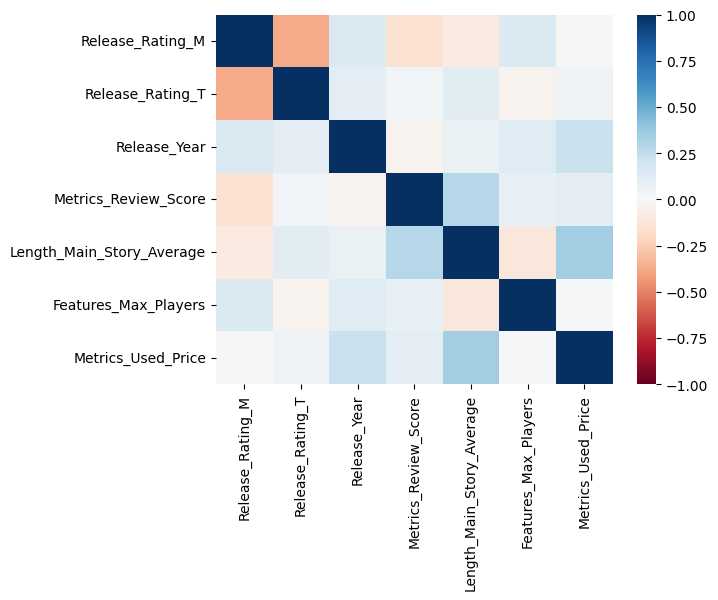

In [ ]:
sns.heatmap(x_test.corr(),vmin=-1, vmax=1, cmap='RdBu')
plt.show()

The equation for this model is log_sales = 111.8935 -0.1422[T.M] - 0.0157[T.T] - 0.0568[Release_Year] + 0.0221[Metric_Review_Score] + 0.0029[Length_Main_Story_Average] + 0.0692[Features_Max_Players]. The test R^2 for this model is 0.3213641523903681, so it is not ideal on predicting the sales of video games. Our final model did not drop any explanatory variables because in our backwards elimination our adjusted models had a lower test R^2 than the current model. So there could be a potential chance of overfitting because however, after looking at the correlation matrix heatmap, none of the variables were closed to 0.7. I believe the slopes are understandable to interpret. Specifically, for every one unit increase in Review Score the Metric Sales of the video game increase by 0.221. The other slopes are also easy to interpret following a similar statement as as I mentioned before. 

## 7. Conclusion

Based on the test R^2 of my final model, I do not reccommend using this model to predict sales of video games. The model only has a test R^2 of about 0.32. I think this model can be improved by adding variables that would better predict sales. I chose the following variables because I believed that they would have a strong impact on predicting sales. However, after running backwards elimination, I saw that none of the Test R^2 were even about 0.35. In lab we have had a big focus on LASSO, Elastic Net Regression, and Ridge Regression. Specifically in Lab 8 we were able to see how different Non Regularized, Linear Ridge Regression, and LASSO differently interpret the relationship between explanatory variables and the predicted variable. The primary limitation encountered was my shortcomoing of choosing better variables in the dataset. To my surprise, release rating did not have a strong impact on predicting game revenue. I thought games with a more user friendly rating , E, would have more sales because it could appeal to a bigger audience. This model can be greatly improved. To enhance this model, adding a wider array of variables could be very beneficial. Only using 7 variables is not really an accurate depiction of the dataset. There were hundreds of games and only using 7 variables would not provide an accurate prediction of sales. Utilizing the Backwards Elimination Algorithm revealed opportunities to enhance model performance by eliminating more variables, hinting that methods such as LASSO, Ridge, and Elastic Net regression could potentially lead to a stronger model by examining a wider array of variables. Moving forward, the plan is to apply more sophisticated algorithms to achieve the highest possible test R-squared value and to search for datasets that offer a more vast selection of variables to improve the overall analysis.